In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from nn_magnetics.data.dataset import get_data_parallel, ChiMode
from nn_magnetics.pytorch.model import Network
from nn_magnetics.utils.plotting import plot_histograms, plot_heatmaps, plot_loss
import matplotlib.pyplot as plt

In [3]:
from numpy import dtype


model = Network(
    in_features=6,
    hidden_dim_factor=6,
    out_features=3,
).to("cpu", dtype=torch.float64)

model.load_state_dict(
    torch.load(
        "../results/isotropic_chi_v2/different-aardvark-14/weights.pt",
        weights_only=True,
    )
)

with torch.no_grad():
    corrections = model(torch.tensor([1, 1, 0.2, 1.5, 1.5, 1.5], dtype=torch.float64))

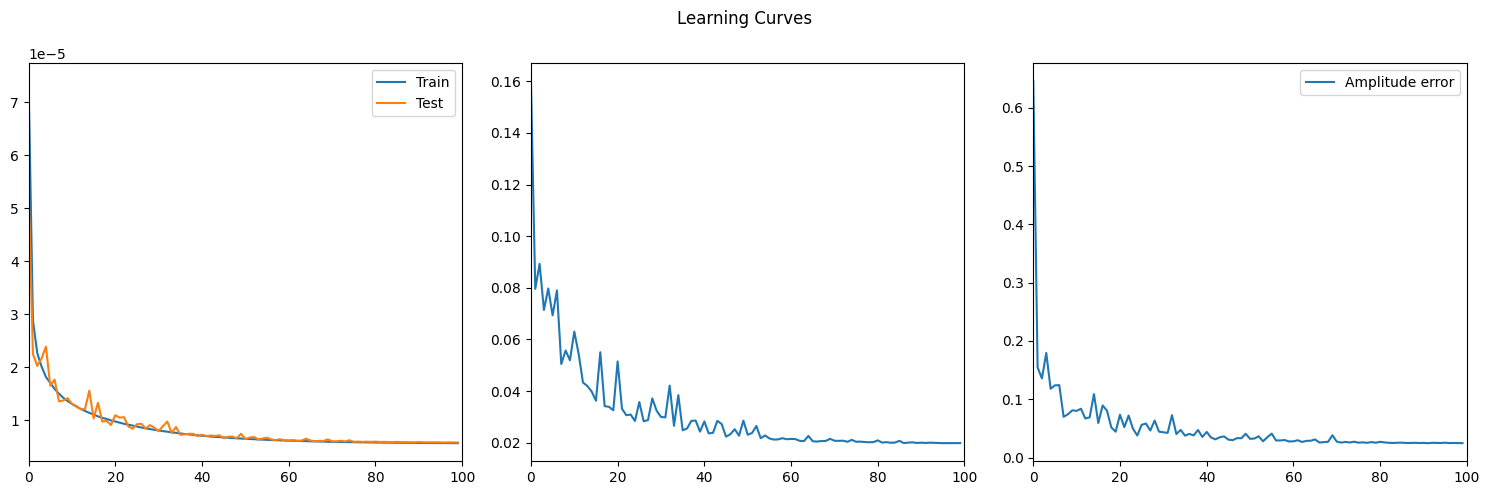

In [8]:
import json

with open("../results/isotropic_chi_v2/different-aardvark-14/training_stats.json", "r") as f:
    stats = json.load(f)

plot_loss(stats=stats, show_plot=True, save_path=".")

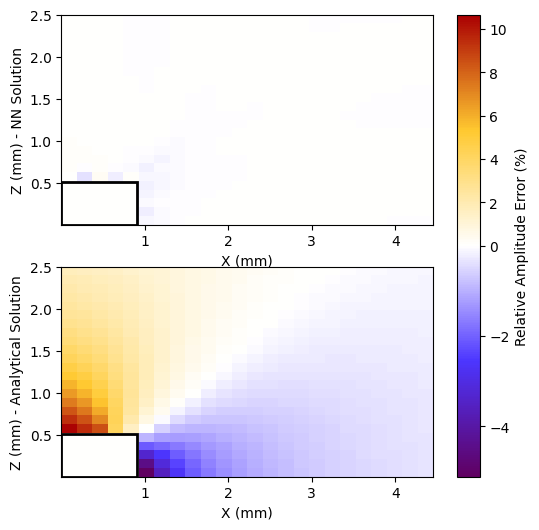

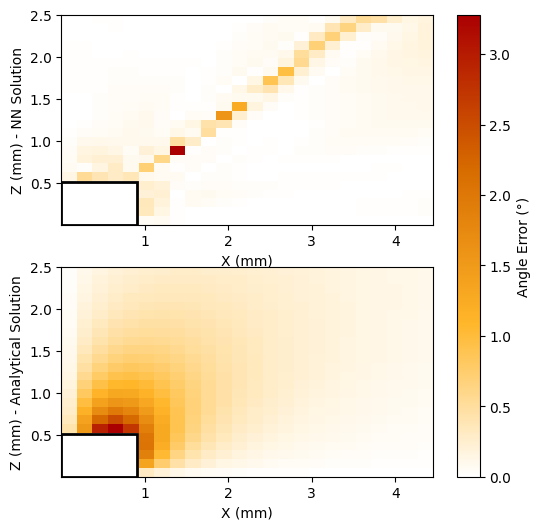

In [6]:
plot_heatmaps(model, save_path=None, chi_mode=ChiMode.ISOTROPIC, eval_path="../data/isotropic_chi/eval/data_1.npz", tag="tikz")

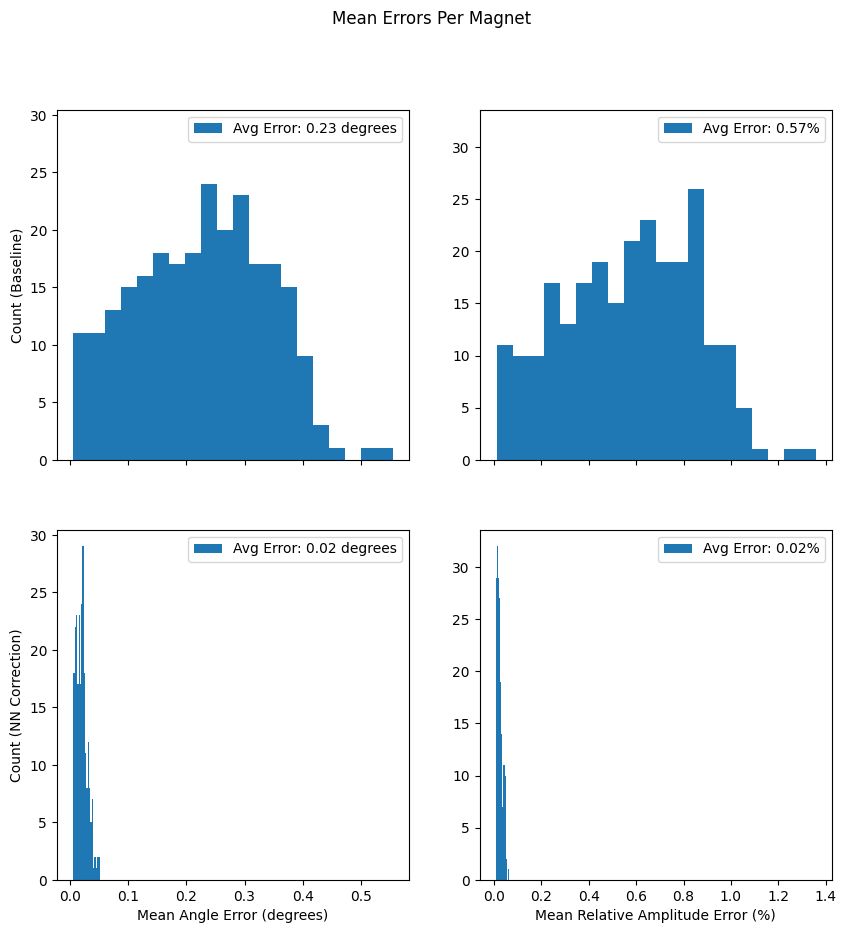

In [7]:
X_test, B_test = get_data_parallel(
    "../data/isotropic_chi/test",
    ChiMode.ISOTROPIC,
)

plot_histograms(
    X_test=X_test,
    B_test=B_test,
    model=model,
    save_path=".",
    show_plot=False,
    tag="isotropic",
)

In [15]:
import torch
from einops import rearrange

In [31]:
a = torch.randint(10, (2, 2))
b = torch.randint(10, (2, 2))

In [32]:
a, b

(tensor([[0, 9],
         [0, 2]]),
 tensor([[1, 4],
         [0, 3]]))

In [36]:
c = torch.einsum("i k, j k -> i j", a, b)

In [37]:
c

tensor([[36, 27],
        [ 8,  6]])

In [35]:
a @ b

tensor([[ 0, 27],
        [ 0,  6]])